<a href="https://colab.research.google.com/github/satyam-jyoti-sankar/Rossmann-Sales-Prediction-/blob/main/Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [85]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [86]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Exploring  Dataset

In [87]:
sales_df=pd.read_csv('/content/drive/MyDrive/ captstone_project-2/Rossmann Stores Data.csv')
store_df = pd.read_csv('/content/drive/MyDrive/ captstone_project-2/store.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Dataset:-1

In [88]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


Here we se no missing valu in our dataset and our data set contains 1017209 data.

In [89]:
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


This dataset contains information on various stores associated with Rossmann. 

It has information for sales for each day, no. of customers on that day, holidays, Promos for each day and what day of week it is.


In [90]:
print(sales_df['Date'].min(),'- start')
print(sales_df['Date'].max(), '- end')

2013-01-01 - start
2015-07-31 - end


Here we se that our all data are between 2013 to 2015

In [91]:
sales_df[sales_df.duplicated()]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday


No duplicate valu present in the data set.

In [92]:
sales_df['Open'].value_counts()

1    844392
0    172817
Name: Open, dtype: int64

Here there are so many data where store is not open .

If store is not open we can't predict sales because sales also 0 if sore are closed.So we conclude only those date where store are open.

In [93]:
# Only consider those data which day store is open
sales_df = sales_df[(sales_df['Open'] == 1)]


In [94]:
# Dropping Open column because no need of of coloum of single valu. 
sales_df.drop(['Open'],axis = 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [95]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017190
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          844392 non-null  int64 
 1   DayOfWeek      844392 non-null  int64 
 2   Date           844392 non-null  object
 3   Sales          844392 non-null  int64 
 4   Customers      844392 non-null  int64 
 5   Promo          844392 non-null  int64 
 6   StateHoliday   844392 non-null  object
 7   SchoolHoliday  844392 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 58.0+ MB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


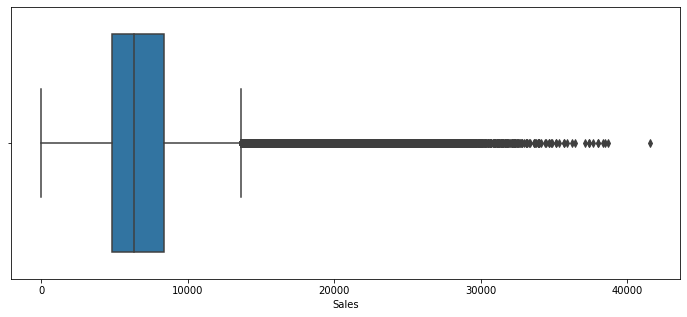

In [96]:
# Checking outliers in Sales
sns.boxplot(sales_df['Sales'])

Many outliers on right side in above plot. So might be those stores are having high sales

###**Using Isolation Forest to remove outliers only in Sales**

In [97]:
from sklearn.ensemble import IsolationForest

In [98]:
isolation_forest = IsolationForest(n_estimators=100, contamination=0.005)
isolation_forest.fit(sales_df['Sales'].values.reshape(-1, 1))
sales_df['anomaly_score_univariate_sales'] = isolation_forest.decision_function(sales_df['Sales'].values.reshape(-1, 1))
sales_df['outlier_univariate_sales'] = isolation_forest.predict(sales_df['Sales'].values.reshape(-1, 1))

### From above plot it is clear intution that our outliers would be above 19000 or 20000.

In [99]:
# Sanity check if there are no outliers removed below 19000
sales_df[(sales_df['outlier_univariate_sales']==-1) & (sales_df['Sales']<19000)]

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,anomaly_score_univariate_sales,outlier_univariate_sales


In [100]:
# Total outliers detected
len(sales_df[sales_df['outlier_univariate_sales']==-1])

4181

### Outliers are very few compared to our dataset. So can remove them. 

In [101]:
# Subsetting DF other than outliers.
sales_df = sales_df[sales_df['outlier_univariate_sales']==1]

In [102]:
# Removing Isolation Forest columns
sales_df.drop(['anomaly_score_univariate_sales','outlier_univariate_sales'],axis = 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [103]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 840211 entries, 0 to 1017190
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          840211 non-null  int64 
 1   DayOfWeek      840211 non-null  int64 
 2   Date           840211 non-null  object
 3   Sales          840211 non-null  int64 
 4   Customers      840211 non-null  int64 
 5   Promo          840211 non-null  int64 
 6   StateHoliday   840211 non-null  object
 7   SchoolHoliday  840211 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 57.7+ MB


## Dataset:-2

In [104]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [105]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

###For competition distance can directly replace Nan by mean, because only 3 missing values. 

### For Month and year can not use mean or mode as there are many missing values. So will try different methods like ffill and backfill to not get same values for all those missing but later.

In [106]:
# Replacing missing values in competition distance with mean
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].mean(),inplace=True)

In [107]:
# # Replacing Nan with 0 in PromoInterval col.
# store_df.update(store_df[['PromoInterval']].fillna(0))

In [108]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

# EDA

## Dataset:-1

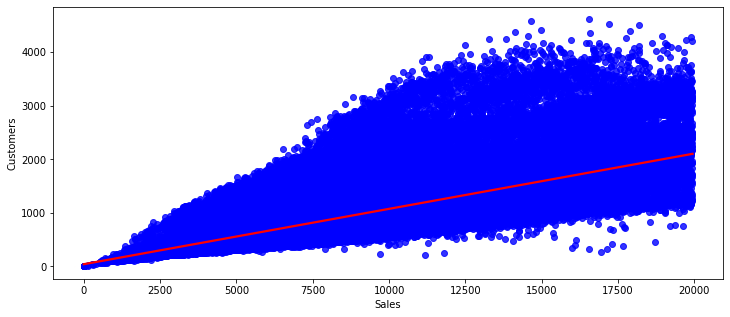

In [109]:
# How customers affect sales
sns.regplot(x=sales_df['Sales'], y=sales_df['Customers'],scatter_kws={"color": "blue"}, line_kws={"color": "red"})

Our target variable is sales when we compare with no of coustumbers here we se when no of coustumber inc no of sales also increase.

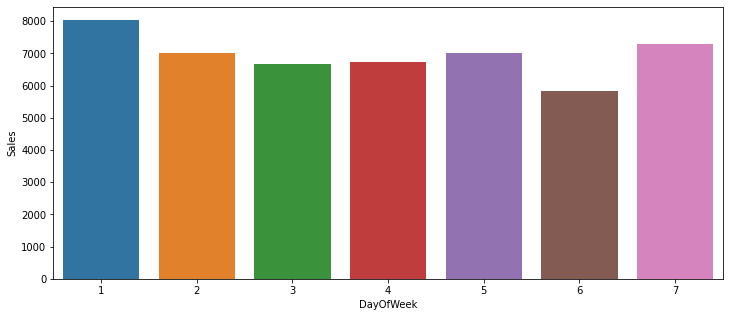

In [110]:
# How Sales differ in each day of week
Avg_week_sales = pd.DataFrame(sales_df.groupby('DayOfWeek').agg({'Sales':'mean'}))
sns.barplot(x=Avg_week_sales.index, y = Avg_week_sales['Sales'])

In the sale on day wise we se monday and sunday .Other are almos close .

so day is not a good factor ..it remain constat every day. 

**But if we se in day of sunday many store are closed but still it shows sale of sunday is high in compare of other day so we can say peole mos go to store on sunday.**

**High sales in starting of week. On Sunday only some stores are open and they are making great Sale.**

In [111]:
# Store open on Sunday
len(sales_df[(sales_df['DayOfWeek']==7)]['Store'].unique())


32

**Among 1115 stores only 32 stores open in sunday but still the total sale is  high in compare to other day.**

How sales differ with Promo

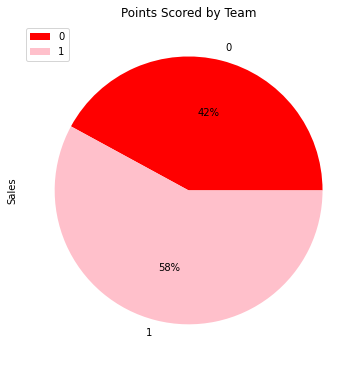

In [112]:
Avg_Promo_sales = pd.DataFrame(sales_df.groupby('Promo')['Sales'].mean())
Avg_Promo_sales.plot(kind='pie', y='Sales', autopct='%1.0f%%',
                                colors = ['red', 'pink'],
                                title='Points Scored by Team',figsize=(6,10))

Sales on Holidays and Holiday Counts

Text(0, 0.5, 'Counts')

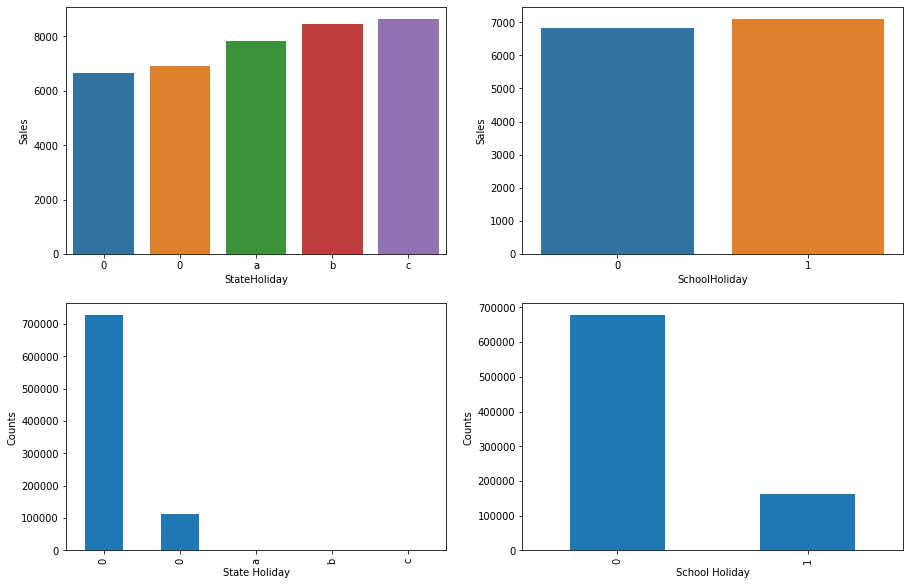

In [113]:
Avg_StateHoliday_sales = pd.DataFrame(sales_df.groupby('StateHoliday')['Sales'].mean())
Avg_SchoolHoliday_sales = pd.DataFrame(sales_df.groupby('SchoolHoliday')['Sales'].mean())

# How sales differ in holidays
fig, ax = plt.subplots(2,2,figsize=(15,10))
ax1=plt.subplot(2, 2,1)
sns.barplot(x=Avg_StateHoliday_sales.index, y = Avg_StateHoliday_sales['Sales'])
ax1=plt.subplot(2, 2,2)
sns.barplot(x=Avg_SchoolHoliday_sales.index, y = Avg_SchoolHoliday_sales['Sales'])

# plotting data on chart

# How many Total School and State holidays
ax1=plt.subplot(2, 2,4)
sales_df['SchoolHoliday'].value_counts().plot(kind='bar')
plt.xlabel('School Holiday')
plt.ylabel('Counts')
ax1=plt.subplot(2, 2,3)
sales_df['StateHoliday'].value_counts().plot(kind='bar')
plt.xlabel('State Holiday')
plt.ylabel('Counts')

NO much difference in sales on School Holidays. On state holidays all stores are to be closed except few.

 But for state holidays we have two 0 columns and others are strings. So will convert all of them to numerical.

 Also count for state holidays is less. So will aggregate all State Holidays as 1.

In [114]:
def num_state_holidays(string):
  if (string == 'a') | (string == 'b') | (string == 'c'):
    return 1
  else:
    return 0

In [115]:
sales_df['StateHoliday'] = sales_df['StateHoliday'].apply(num_state_holidays)

As for our dataset 3 type of holiday but we combine all and take all as holy day and other as not holiday.
holiday as 1 else 0

In [116]:
sales_df['StateHoliday'].value_counts()

0    839338
1       873
Name: StateHoliday, dtype: int64

###We have gone through all features initially and have see how sales differ for all of them. 

###**Avg Sales and Customer Data Set**

In [117]:
avg_sales_df =pd.DataFrame(sales_df.groupby('Store')['Customers','Sales'].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Our goal is to predict sales day wise so we consider avg sales perday so we predict the sales per day .

In 2nd we have avg coustumber to a store .

If we consider sum of sales then it predict sales store wise in a yr.

In [118]:
avg_sales_df

,Customers,Sales
Store,,
1,564.049936,4759.096031
2,583.998724,4953.900510
3,750.077022,6942.568678
4,1321.752551,9638.401786
5,537.340180,4676.274711
...,...,...
1111,451.711168,5251.702182
1112,829.988296,10076.834850
1113,717.029337,6627.859694


In [119]:
avg_sales_df.columns = ['Avg_customers','Avg_sales']

In [120]:
avg_sales_df

,Avg_customers,Avg_sales
Store,,
1,564.049936,4759.096031
2,583.998724,4953.900510
3,750.077022,6942.568678
4,1321.752551,9638.401786
5,537.340180,4676.274711
...,...,...
1111,451.711168,5251.702182
1112,829.988296,10076.834850
1113,717.029337,6627.859694


## Dataset:-2

### **Different kind of store model**

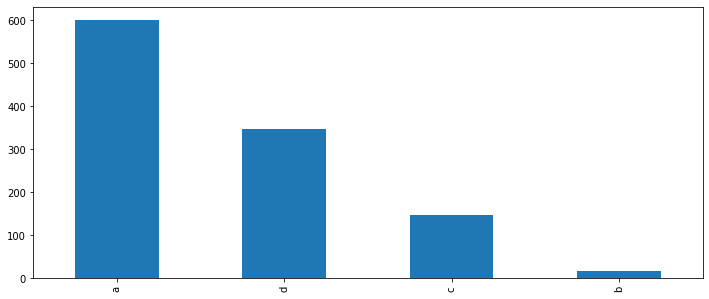

In [121]:
# Different kind of store model
store_df['StoreType'].value_counts().plot(kind='bar')

**There are 4 type of model..There are very less no of data for store b ..And in top a ,store  high no of data.**

### Assortment 

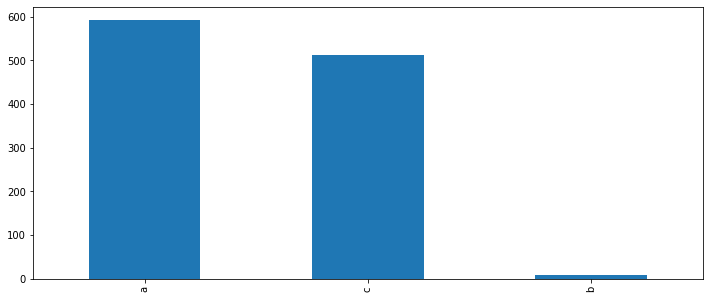

In [122]:
#Assortment 
store_df['Assortment'].value_counts().plot(kind='bar')

In assortment also b is so low in comapre to a and c.

Assortment - describes an assortment level: a = basic, b = extra, c = extended

So here we know that thre are either basic or exended but less of extra


### Promo2

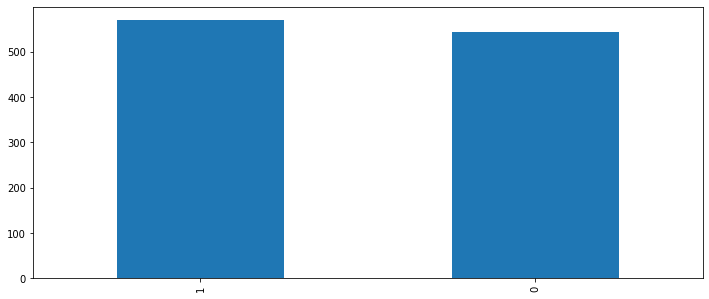

In [123]:
store_df['Promo2'].value_counts().plot(kind='bar')

### PROMO INTERVAL counts

In [124]:
#PROMO INTERVAL
store_df['PromoInterval'].value_counts()

Jan,Apr,Jul,Oct     335
Feb,May,Aug,Nov     130
Mar,Jun,Sept,Dec    106
Name: PromoInterval, dtype: int64

PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew

Here 3 different prmointerval  and jan,apr,july oct is high in compare to both .

Here we conclude that 2 months interval for promo is  high.

In [125]:
len(store_df['Store'].unique())


1115

## Merge dataset 

In [126]:
# Merging avg sales dataset with store df
store_df = pd.merge(store_df,avg_sales_df, on = 'Store', how = 'left')

In [127]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1115 entries, 0 to 1114
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
 10  Avg_customers              1115 non-null   float64
 11  Avg_sales                  1115 non-null   float64
dtypes: float64(7), int64(2), object(3)
memory usage: 113.2+ KB


In [128]:
store_df.head() 

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Avg_customers,Avg_sales
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,564.049936,4759.096031
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",583.998724,4953.900510
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",750.077022,6942.568678
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,1321.752551,9638.401786
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,537.340180,4676.274711


##**Final Data Set**

###Now we already have unique stores in both datasets, so can merge both data sets and draw some meanigful insights from that.

In [129]:
# Mrging both DFs
Final_df = pd.merge(sales_df,store_df, on = 'Store', how = 'left')

In [130]:
# Shape of final dataset
Final_df.shape

(840211, 19)

### EDA and re-arranging Final Dataset

In [131]:
# If store is open and there is no sale
len(Final_df[(Final_df['Sales'] == 0)])

54

### There are very few observations where Sales is 0. This can be a possibility that on certain days there was no Sale.

##**Feature Eng**

In [132]:
# One hot encoding
Final_df = pd.get_dummies(Final_df, columns=['StoreType','PromoInterval', 'Assortment'], prefix=['StoreType','PromoInterval', 'Assortment'])

### Date columns to Date time and extract month and year.

In [133]:
import datetime

In [134]:
# Seperating month, year and day from date.
Final_df['Month'] = pd.DatetimeIndex(Final_df['Date']).month
Final_df['Year'] = pd.DatetimeIndex(Final_df['Date']).year
Final_df['Day'] = pd.DatetimeIndex(Final_df['Date']).day

In [135]:
# Dropping original Date column. 
#Final_df.drop(['Date'],axis = 1, inplace=True)

### Now we will find Total competition months by aggregating 'Total_competition_year' and 'Total_competition_months' for each obsservation. 

In [136]:
Final_df['Total_competition_year'] = Final_df['Year'] - Final_df['CompetitionOpenSinceYear']

In [137]:
Final_df['Total_competition_months'] = (Final_df['Total_competition_year']*12) - (Final_df['CompetitionOpenSinceMonth'] - 1) + (Final_df['Month'])

In [138]:
# Removing both original columns
Final_df.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear', 'Total_competition_year'],axis = 1, inplace=True)

###Doing Same for Promo as well.

In [139]:
Final_df['Total_promo_years'] = Final_df['Year'] - Final_df['Promo2SinceYear']

In [140]:
Final_df['Total_promo_weeks'] = (Final_df['Total_promo_years']*52) - (Final_df['Promo2SinceWeek']-1) + (Final_df['Month']*4)

In [141]:
# Removing both original columns
Final_df.drop(['Total_promo_years', 'Promo2SinceYear', 'Promo2SinceWeek'],axis = 1, inplace=True)

### Now we will replace null values in both this columns to get a complete dataset. 

In [142]:
# Replacing Nan with 0 in below cols.
Final_df.update(Final_df[['Total_promo_weeks']].fillna(0))

In [143]:
# Replacing missing values in Competition open since month by ffill, limit = 2
Final_df.fillna(method='ffill', limit = 1, inplace = True)

In [144]:
# Replacing missing values in Competition open since month by ffill, limit = 2
Final_df.fillna(method='backfill', limit = 2, inplace = True)

In [145]:
# Filling rest values with mean
Final_df['Total_competition_months'].fillna(Final_df['Total_competition_months'].mean(),inplace=True)

In [146]:
Final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 840211 entries, 0 to 840210
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Store                           840211 non-null  int64  
 1   DayOfWeek                       840211 non-null  int64  
 2   Date                            840211 non-null  object 
 3   Sales                           840211 non-null  int64  
 4   Customers                       840211 non-null  int64  
 5   Promo                           840211 non-null  int64  
 6   StateHoliday                    840211 non-null  int64  
 7   SchoolHoliday                   840211 non-null  int64  
 8   CompetitionDistance             840211 non-null  float64
 9   Promo2                          840211 non-null  int64  
 10  Avg_customers                   840211 non-null  float64
 11  Avg_sales                       840211 non-null  float64
 12  StoreType_a     

At the end we have a complete dataset with no missing values. 

###**EDA of 2nd DF with Final DF and Distributions**

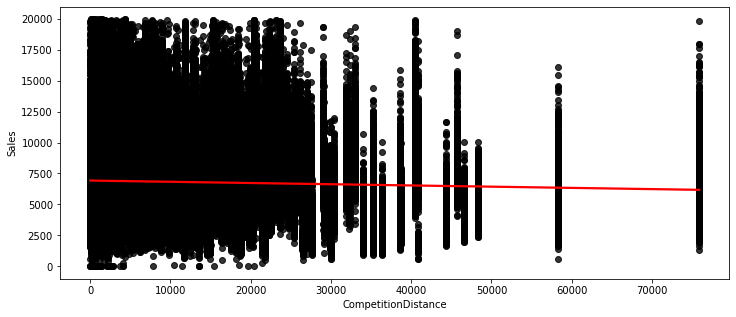

In [147]:
plt.rcParams['figure.figsize'] = (12, 5)
sns.regplot(x=Final_df['CompetitionDistance'], y = Final_df['Sales'],scatter_kws={"color": "black"}, line_kws={"color": "red"})

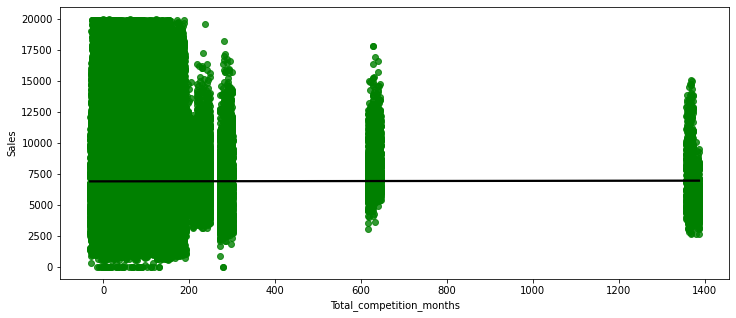

In [148]:
sns.regplot(x=Final_df['Total_competition_months'], y = Final_df['Sales'],scatter_kws={"color": "green"}, line_kws={"color": "black"})

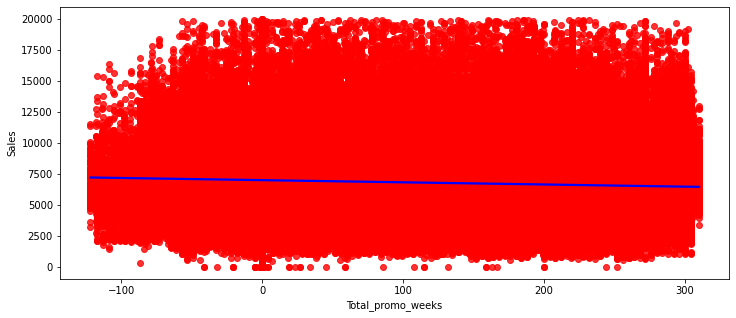

In [149]:
sns.regplot(x=Final_df['Total_promo_weeks'], y = Final_df['Sales'],scatter_kws={"color": "red"}, line_kws={"color": "blue"})

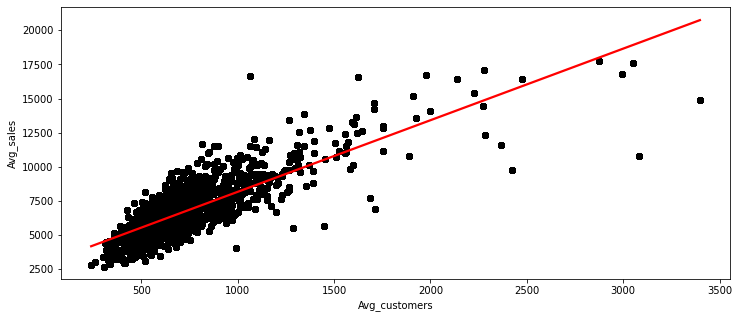

In [150]:
sns.regplot(x=Final_df['Avg_customers'], y = Final_df['Avg_sales'],scatter_kws={"color": "black"}, line_kws={"color": "red"})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

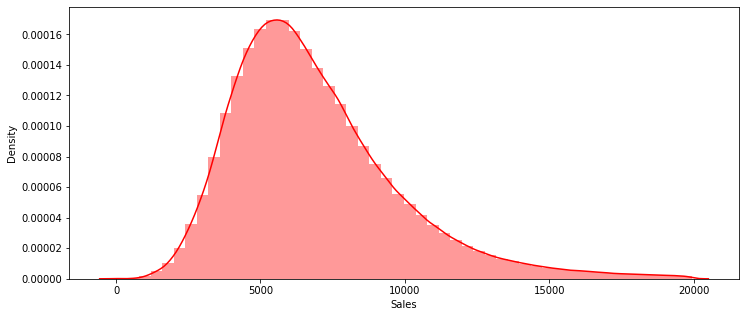

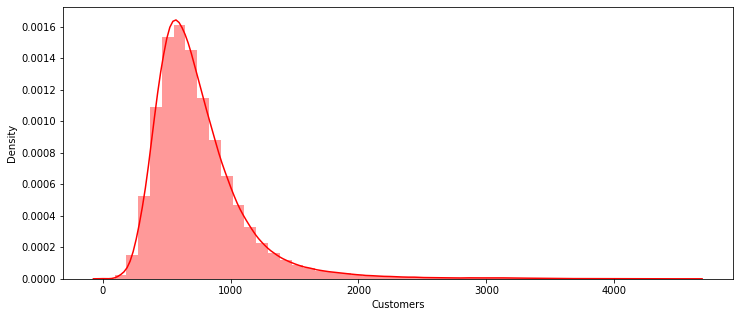

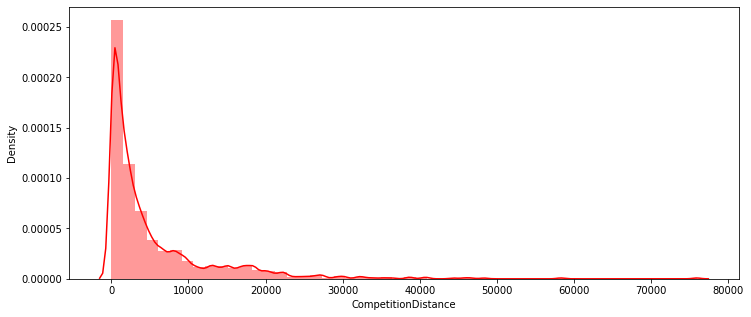

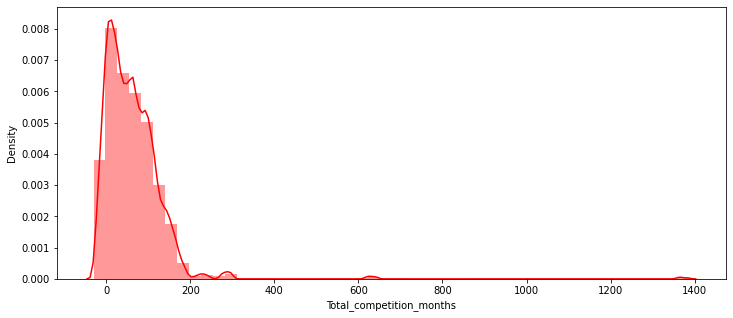

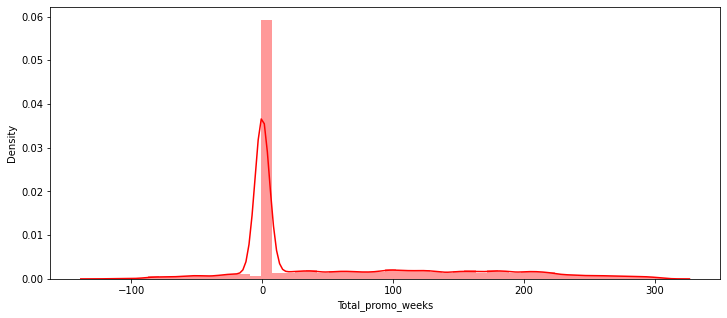

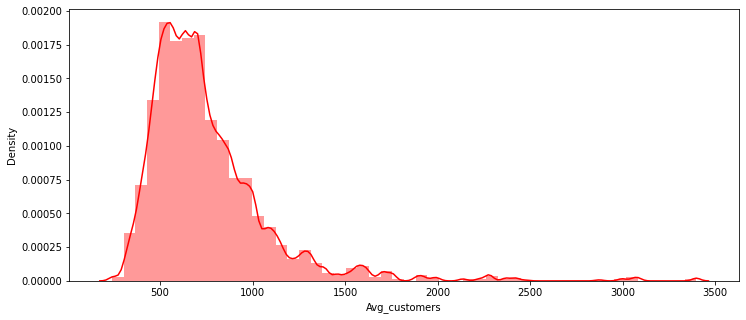

In [151]:
# Distributions
for col in ['Sales', 'Customers', 'CompetitionDistance', 'Total_competition_months','Total_promo_weeks', 'Avg_customers']:
  plt.figure()
  sns.distplot(Final_df[col], color='r')

In [152]:
Final_df.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,...,"PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",Assortment_a,Assortment_b,Assortment_c,Month,Year,Day,Total_competition_months,Total_promo_weeks
0,1,5,2015-07-31,5263,555,1,0,1,1270.0,0,...,0,0,1,0,0,7,2015,31,83.0,0.0
1,2,5,2015-07-31,6064,625,1,0,1,570.0,1,...,1,0,1,0,0,7,2015,31,93.0,276.0
2,3,5,2015-07-31,8314,821,1,0,1,14130.0,1,...,1,0,1,0,0,7,2015,31,104.0,223.0


In [153]:
# Assign Date column to Date(Year-Month) instead of (Year-Month-Day)
# this column will be useful in analysis and visualization
Final_df['Date'] = Final_df['Date'].apply(lambda x: (str(x)[:7]))

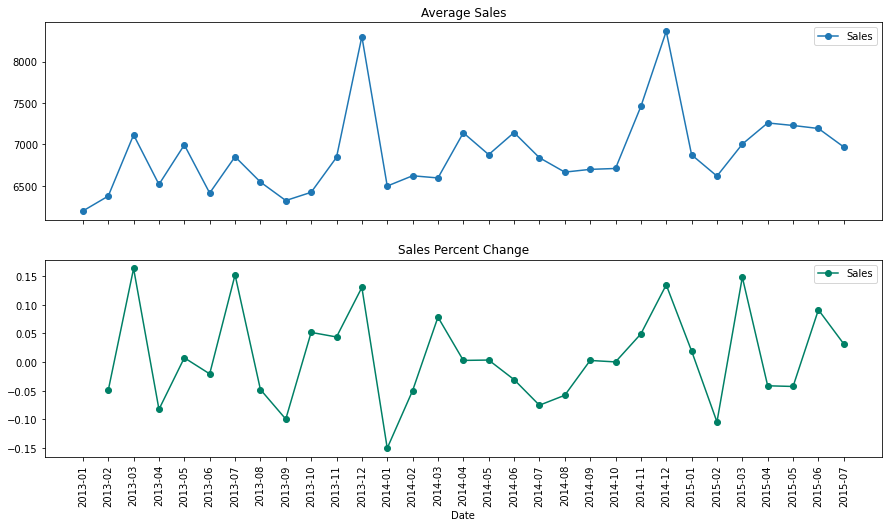

In [154]:
# group by date and get average sales, and precent change
average_sales    = Final_df.groupby('Date')["Sales"].mean()
pct_change_sales = Final_df.groupby('Date')["Sales"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average sales over time(year-month)
ax1 = average_sales.plot(legend=True,ax=axis1,marker='o',title="Average Sales")
ax1.set_xticks(range(len(average_sales)))
ax1.set_xticklabels(average_sales.index.tolist(), rotation=90)

# plot precent change for sales over time(year-month)
ax2 = pct_change_sales.plot(legend=True,ax=axis2,marker='o',rot=90,colormap="summer",title="Sales Percent Change")
# ax2.set_xticks(range(len(pct_change_sales)))
# ax2.set_xticklabels(pct_change_sales.index.tolist(), rotation=90)

In [155]:
Final_df.drop(['Date','Store', 'Customers', 'Year'], axis = 1, inplace =True)

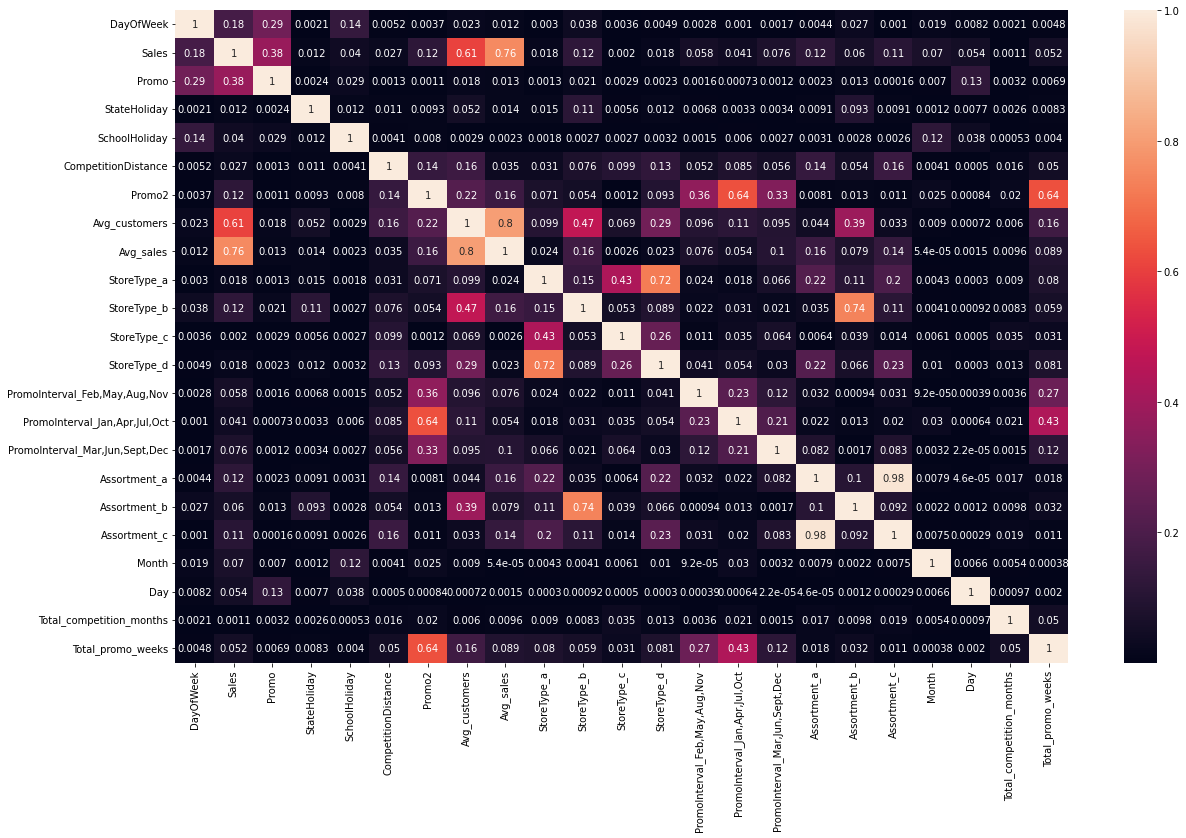

In [156]:
plt.subplots(figsize=(20,12))
sns.heatmap(Final_df.corr().abs(), annot=True)

###Saving Final DF, so that can further use directly. 

In [157]:
# Saving Final DF
Final_df.to_csv('/content/drive/MyDrive/ captstone_project-2'+ 'Final_dataset.csv', index= False)

In [158]:
# Importing saved DF
Final_df_saved = pd.read_csv('/content/drive/MyDrive/ captstone_project-2Final_dataset.csv')

In [159]:
Final_df_saved.shape

(840211, 23)

In [160]:
Final_df

,DayOfWeek,Sales,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,Avg_customers,Avg_sales,StoreType_a,...,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",Assortment_a,Assortment_b,Assortment_c,Month,Day,Total_competition_months,Total_promo_weeks
0,5,5263,1,0,1,1270.0,0,564.049936,4759.096031,0,...,0,0,0,1,0,0,7,31,83.0,0.0
1,5,6064,1,0,1,570.0,1,583.998724,4953.900510,1,...,0,1,0,1,0,0,7,31,93.0,276.0
2,5,8314,1,0,1,14130.0,1,750.077022,6942.568678,1,...,0,1,0,1,0,0,7,31,104.0,223.0
3,5,13995,1,0,1,620.0,0,1321.752551,9638.401786,0,...,0,0,0,0,0,1,7,31,71.0,0.0
4,5,4822,1,0,1,29910.0,0,537.340180,4676.274711,1,...,0,0,0,1,0,0,7,31,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840206,2,3375,0,1,1,150.0,0,1756.044728,11174.719915,0,...,0,0,0,1,0,0,1,1,77.0,0.0
840207,2,10765,0,1,1,860.0,0,3397.519786,14888.084492,0,...,0,0,0,0,1,0,1,1,160.0,0.0
840208,2,5035,0,1,1,840.0,1,3081.052017,10825.902335,0,...,0,1,0,0,1,0,1,1,160.0,9.0
840209,2,4491,0,1,1,1430.0,0,1712.427802,6936.760776,0,...,0,0,0,0,1,0,1,1,131.0,0.0


# Train test split

In [161]:
# X and Y
X = Final_df_saved.drop(['Sales'], axis = 1)
y = Final_df_saved['Sales']

In [162]:
# Copy of DataFrame
LR_df = Final_df_saved.copy()

In [163]:
# Import Required Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression, LassoCV
from sklearn.metrics import r2_score, mean_squared_error, make_scorer


In [164]:
LR_df['Sales'] = np.sqrt(LR_df['Sales'])
LR_df['Avg_customers'] = np.sqrt(LR_df['Avg_customers'])
LR_df['CompetitionDistance'] = np.sqrt(LR_df['CompetitionDistance'])
#LR_df['Total_competition_months'] = np.log(LR_df['Total_competition_months'])

In [165]:
# X and Y
X = LR_df.drop(['Sales'], axis = 1)
y = LR_df['Sales']

# Implementing Modal


•	 Linear Regression (Baseline Model)

•	 Lasso (Hyperparameter)

•	Decision tree by using decision tree regressor (Hyperparameter)

•	Random forest regressor

•	Gradient Boosting Regression

•	Xg boost regressor (Hyperparameter)


##**Linear Regression**

In [166]:
# Train Test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [167]:
train={}

test={}

In [168]:
# linier regratation
reg= LinearRegression().fit(x_train, y_train)

In [169]:
y_pred_train=reg.predict(x_train)
y_pred_test=reg.predict(x_test)

In [170]:
# metrics for linier regressor flor train dataset
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
train['Linier regreson']=MSE,RMSE,r2,1-(1-r2_score(y_train, y_pred_train))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) 

MSE : 72.66935158575986
RMSE : 8.524632049875224
R2 : 0.7423975838010293
Adjusted R2 : 0.7423750983595481


In [171]:
#metrics for linear regression analysis for test dataset
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_test), (y_pred_test))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
r2= r2_score(y_test, y_pred_test)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
test['Linier regreson']=MSE,RMSE,r2,1-(1-r2_score(y_test, y_pred_test))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

MSE : 72.40464240122799
RMSE : 8.509091749489365
R2 : 0.7438439905259265
Adjusted R2 : 0.743821631337507


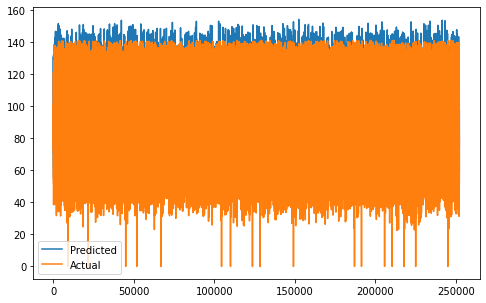

In [172]:
#Compare between y_pred_test vs original y_test
plt.figure(figsize=(8,5))
plt.plot(np.array(y_pred_test))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

### It is a good model with almost 74% accuracy on train and test dataset.

### So it's not a overfitted model. But some errors. 

### But after all a good base model to start with.

### Other metric for model evaluation would be RMSE or MSE. We would try to get lowest RMSE score. So our error predictions are less.

## Lasso(Hyperparameter)
 


In [173]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [174]:
#importing lasso regression model
from sklearn.linear_model import Lasso
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso,parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.702e+07, tolerance: 1.326e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.709e+07, tolerance: 1.327e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [175]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-08}

Using  {'alpha': 1e-08}  the negative mean squared error is:  -72.67567532795105


In [176]:
lasso=Lasso(alpha=0.001,max_iter=3000)
lasso.fit(x_train,y_train)

Lasso(alpha=0.001, max_iter=3000)

In [177]:
# lasso score 
lasso.score(x_train, y_train)

0.7423925150754576

In [178]:
# lasso y pred test and train
y_pred_train_lasso=lasso.predict(x_train)
y_pred_test_lasso=lasso.predict(x_test)

In [179]:
# metrics for lasso regressor flor train dataset
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
train['Lasso regreson']=MSE,RMSE,r2,1-(1-r2_score(y_train, y_pred_train_lasso))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

MSE : 72.67078146753694
RMSE : 8.524715917116355
R2 : 0.7423925150754576
Adjusted R2 : 0.7423700291915405


In [180]:
# metrics for ridge regression for test
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_test), (y_pred_test_lasso))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test_lasso)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_lasso))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
test['Lasso regreson']=MSE,RMSE,r2,1-(1-r2_score(y_test, y_pred_test_lasso))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))


MSE : 72.40978143885137
RMSE : 8.509393717466091
R2 : 0.7438258094352328
Adjusted R2 : 0.7438034486598335


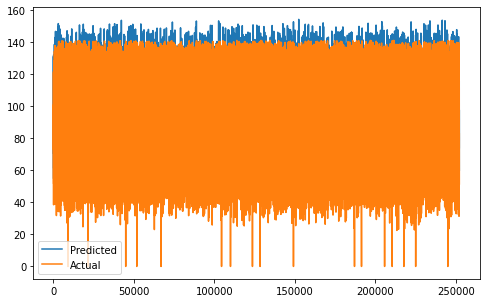

In [181]:
plt.figure(figsize=(8,5))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

## Decision tree by using decision tree regressor(Hyperparameter)

In [219]:
from sklearn.tree import DecisionTreeRegressor
reg_decision_model=DecisionTreeRegressor()
parameters={"splitter":["best","random"],
            "max_depth" : [7,10,18,20,25]}
 
          #  "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
          #  "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
          #  "max_features":["auto","log2","sqrt",None],
          #  "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }
tuning_model=GridSearchCV(reg_decision_model,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)
tuning_model.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END ......max_depth=7, splitter=best;, score=-58.274 total time=   1.7s
[CV 2/3] END ......max_depth=7, splitter=best;, score=-57.488 total time=   1.7s
[CV 3/3] END ......max_depth=7, splitter=best;, score=-58.201 total time=   1.6s
[CV 1/3] END ....max_depth=7, splitter=random;, score=-77.789 total time=   0.9s
[CV 2/3] END ....max_depth=7, splitter=random;, score=-67.313 total time=   0.9s
[CV 3/3] END ....max_depth=7, splitter=random;, score=-69.059 total time=   0.9s
[CV 1/3] END .....max_depth=10, splitter=best;, score=-47.254 total time=   2.3s
[CV 2/3] END .....max_depth=10, splitter=best;, score=-47.300 total time=   2.3s
[CV 3/3] END .....max_depth=10, splitter=best;, score=-47.051 total time=   2.3s
[CV 1/3] END ...max_depth=10, splitter=random;, score=-55.961 total time=   1.2s
[CV 2/3] END ...max_depth=10, splitter=random;, score=-65.178 total time=   1.1s
[CV 3/3] END ...max_depth=10, splitter=random;, 

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [7, 10, 18, 20, 25],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [220]:
# print("The best fit alpha value is found out to be :" ,tuning_model.best_params_)
# print("\nUsing ",reg_decision_model.best_params_, " the negative mean squared error is: ", tuning_model.best_score_)

In [221]:
#importing the decision tree model for training 
decision_regressor =  DecisionTreeRegressor(criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=80,splitter='best')
decision_regressor.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


DecisionTreeRegressor(criterion='mse', max_depth=10, max_leaf_nodes=80)

In [222]:
#y pred for test and train data
y_pred_train_dt = decision_regressor.predict(x_train)
y_pred_test_dt = decision_regressor.predict(x_test)

In [223]:
#metric for decison tree for train data
from sklearn.metrics import mean_squared_error
print("Model Score:",decision_regressor.score(x_train,y_train))

MSE= mean_squared_error(y_train, y_pred_train_dt)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_dt)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_dt))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
train['DecisionTreeRegressor']=MSE,RMSE,r2,1-(1-r2_score(y_train, y_pred_train_dt))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

Model Score: 0.7898611082589061
MSE : 59.27994477342366
RMSE : 7.699347035523445
R2 : 0.7898611082589061
Adjusted R2 : 0.7898427657843948


In [224]:
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error(y_test, y_pred_test_dt)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

from sklearn.metrics import r2_score
r2= r2_score((y_test), (y_pred_test_dt))
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_dt)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
test['DecisionTreeRegressor']=MSE,RMSE,r2,1-(1-r2_score((y_test), (y_pred_test_dt)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

MSE : 59.419466591675246
RMSE : 7.708402337169178
R2 : 0.7897834594243723
Adjusted R2 : 0.7897651101720973


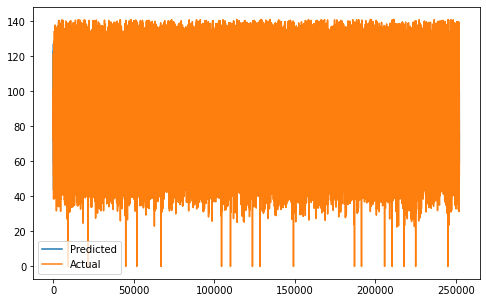

In [225]:
#pred vs actual for decision tree
plt.figure(figsize=(8,5))
plt.plot((np.array(y_pred_test_dt)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

## Random forest Rergressor

In [199]:
# Hyperparameter tuning

from sklearn.ensemble import RandomForestRegressor
# random_forest=RandomForestRegressor() # For GBM, use GradientBoostingClassifier()
# grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}
# #n_estimators=no of trees
# #max_depth=How much maximum depth the d-tree is goes
# random_forest= GridSearchCV(random_forest, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# # Fit the object to train dataset
# random_forest.fit(x_train, y_train)
#creating an instance for the random forest
rf_model=RandomForestRegressor()
rf_model.fit(x_train,y_train)

RandomForestRegressor()

In [200]:
# print(rf_model.best_params_)
# rf_model.best_score_

In [201]:
# y_pred_train_rf = random_forest.predict(x_train)
# y_pred_test_rf = random_forest.predict(x_test)
y_pred_train_rf = rf_model.predict(x_train)
y_pred_test_rf = rf_model.predict(x_test)

In [202]:
#metric score for the rf for train dataset
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(x_train,y_train))

MSE= mean_squared_error(y_train, y_pred_train_rf)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_rf)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_rf))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
train['Random_forest']=MSE,RMSE,r2,1-(1-r2_score(y_train, y_pred_train_rf))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))


Model Score: 0.9900615055040577
MSE : 2.803638107962953
RMSE : 1.6744067928561903
R2 : 0.9900615055040577
Adjusted R2 : 0.9900606379988546


In [203]:
# test random forest
print("Model Score:",rf_model.score(x_test,y_test))

MSE= mean_squared_error(y_test, y_pred_test_rf)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test_rf)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_rf))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
test['Random_forest']=MSE,RMSE,r2,1-(1-r2_score(y_test, y_pred_test_rf))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

Model Score: 0.9291166947178242
MSE : 20.035760167057393
RMSE : 4.476132277654157
R2 : 0.9291166947178242
Adjusted R2 : 0.9291105074994105


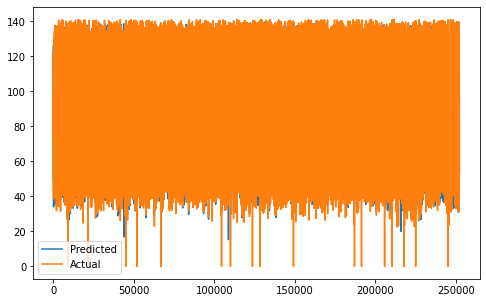

In [204]:
#pred vs actual for random forest
plt.figure(figsize=(8,5))
plt.plot((np.array(y_pred_test_rf)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

## Gradient Boosting Regression

In [208]:
from sklearn.ensemble import GradientBoostingRegressor
gbd_model=GradientBoostingRegressor()
parameters = {'learning_rate': [0.01,0.04],
                  # 'subsample'    : [0.9, 0.5, 0.2, 0.1],
              #'min_child_weight': [10,15],
                  'n_estimators' : [100,500],
                  'max_depth'    : [6,8,10]
                 }

In [209]:
gbd_model=GradientBoostingRegressor()
gbd_model.fit(x_train,y_train)

GradientBoostingRegressor()

In [210]:
# gbd_model.best_params_
# gb_regression.best_estimator_

In [211]:
y_pred_train_gb = gbd_model.predict(x_train)
y_pred_test_gb = gbd_model.predict(x_test)

In [212]:
# # Making predictions on train and test data

# y_pred_train_gb = gb_optimal_model.predict(x_train)
# y_pred_test_gb = gb_optimal_model.predict(x_test)

In [213]:
#metrics for rf score with gd for train
from sklearn.metrics import mean_squared_error
print("Model Score:",gbd_model.score(x_train,y_train))

MSE= mean_squared_error(y_train,y_pred_train_gb)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_gb)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_gb))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
train['GradientBoostingRegressor']=MSE,RMSE,r2,1-(1-r2_score(y_train, y_pred_train_gb))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

Model Score: 0.8349658292036761
MSE : 46.55595377645498
RMSE : 6.823192344969836
R2 : 0.8349658292036761
Adjusted R2 : 0.8349514238023426


In [214]:
#metrics for rf score with gd for test
from sklearn.metrics import mean_squared_error
print("Model Score:",gbd_model.score(x_test,y_test))

MSE= mean_squared_error(y_test, y_pred_test_gb)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test_gb)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_gb))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
test['GradientBoostingRegressor']=MSE,RMSE,r2,1-(1-r2_score(y_test, y_pred_test_gb))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

Model Score: 0.8350338529209714
MSE : 46.62906371819621
RMSE : 6.8285477019785255
R2 : 0.8350338529209714
Adjusted R2 : 0.8350194534572503


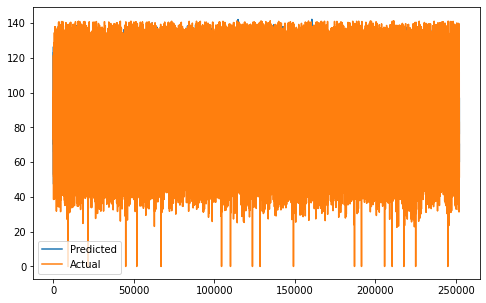

In [215]:
#pred vs actual for Gradient boosting
plt.figure(figsize=(8,5))
plt.plot((np.array(y_pred_test_gb)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

## Xgboost Regressor

In [189]:
import xgboost as xgb
xg_model = xgb.XGBRegressor()
parameters = { 'max_depth':[8], 
              'min_child_weight': [15], 
              'n_estimators': [100]}
     

In [190]:
xg_regression=GridSearchCV(xg_model,param_grid=parameters,scoring='roc_auc',cv=5,verbose=3)
xg_regression.fit(x_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[13:27:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  UserWarning,


[CV 1/5] END max_depth=8, min_child_weight=15, n_estimators=100;, score=nan total time= 1.9min
[13:29:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  UserWarning,


[CV 2/5] END max_depth=8, min_child_weight=15, n_estimators=100;, score=nan total time= 1.9min
[13:31:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  UserWarning,


[CV 3/5] END max_depth=8, min_child_weight=15, n_estimators=100;, score=nan total time= 1.8min
[13:32:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  UserWarning,


[CV 4/5] END max_depth=8, min_child_weight=15, n_estimators=100;, score=nan total time= 1.8min
[13:34:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan]
  category=UserWarning,


[CV 5/5] END max_depth=8, min_child_weight=15, n_estimators=100;, score=nan total time= 1.8min
[13:36:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, estimator=XGBRegressor(),
             param_grid={'max_depth': [8], 'min_child_weight': [15],
                         'n_estimators': [100]},
             scoring='roc_auc', verbose=3)

In [191]:
xg_regression.best_params_
# xg_regression.best_estimator_

{'max_depth': 8, 'min_child_weight': 15, 'n_estimators': 100}

In [192]:
xg_regression.best_estimator_
xg_optimal_model = xg_regression.best_estimator_
# xg_grid.best_params_
# Making predictions on train and test data

y_pred_train_x_g = xg_optimal_model.predict(x_train)
y_pred_test_x_g  = xg_optimal_model.predict(x_test)

In [193]:
#xg after training score for train data
print("Model Score:",xg_optimal_model.score(x_train,y_train))
MSE= mean_squared_error(y_train, y_pred_train_x_g)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
r2= r2_score(y_train, y_pred_train_x_g)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_x_g))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
train['XGBoost']=MSE,RMSE,r2,1-(1-r2_score(y_train, y_pred_train_x_g))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

Model Score: 0.9049937294419974
MSE : 26.801161960758435
RMSE : 5.1769838671526145
R2 : 0.9049937294419974
Adjusted R2 : 0.9049854365930075


In [194]:
#Xg boost  after training for test
print("Model Score:",xg_optimal_model.score(x_train,y_train))
MSE= mean_squared_error(y_test, y_pred_test_x_g)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

r2= r2_score((y_test), (y_pred_test_x_g))
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_x_g)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
test['XGBoost']=MSE,RMSE,r2,1-(1-r2_score((y_test), (y_pred_test_x_g)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))


Model Score: 0.9049937294419974
MSE : 27.615515282849135
RMSE : 5.255046648969839
R2 : 0.9023007370822268
Adjusted R2 : 0.9022922091689738


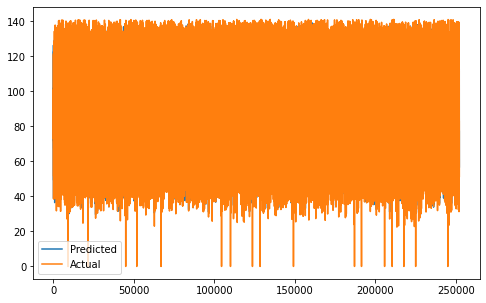

In [195]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_test_x_g))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# Cheack model 

In [230]:
Test=pd.DataFrame(test,index=["Test MSE", "Test RMSE",'Test R^2','Test Adjusted R^2'])
Train=pd.DataFrame(train,index=["Train MSE", "Train RMSE",'Train R^2','Train Adjusted R^2'])

In [231]:
Test.transpose()

,Test MSE,Test RMSE,Test R^2,Test Adjusted R^2
Linier regreson,72.404642,8.509092,0.743844,0.743822
Lasso regreson,72.409781,8.509394,0.743826,0.743803
XGBoost,27.615515,5.255047,0.902301,0.902292
Random_forest,20.035760,4.476132,0.929117,0.929111
GradientBoostingRegressor,46.629064,6.828548,0.835034,0.835019
DecisionTreeRegressor,59.419467,7.708402,0.789783,0.789765


In [232]:
Train.transpose()

,Train MSE,Train RMSE,Train R^2,Train Adjusted R^2
Linier regreson,72.669352,8.524632,0.742398,0.742375
Lasso regreson,72.670781,8.524716,0.742393,0.742370
XGBoost,26.801162,5.176984,0.904994,0.904985
Random_forest,2.803638,1.674407,0.990062,0.990061
GradientBoostingRegressor,46.555954,6.823192,0.834966,0.834951
DecisionTreeRegressor,59.279945,7.699347,0.789861,0.789843


# Conclusion


* Random forest regressor gives us high accuracy of 93% for our test data set in case of train data it show accuracy of 99% .
* Xg boost gives 90% in both train and test case both r2 score and adj r2.
* In case of random forest a  little bit overfit occur but in xg boost it work properly.


*	Our base model liner regression created a base line of accuracy of 74%.

*	The lasso model although we use hyper parameter it gives us similar performance like linear regression.   

* In case of Decision tree by using decision tree regressor (Hyperparameter) it gives us 78% accuracy in train and 79 accuracy for test case.
